<a href="https://colab.research.google.com/drive/1YzrwLdWsxfF1ooPnpK6EsmvgmQQgrEWg" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Time-Frequency Analysis </center></h1> 

The Fourier transform is one of the most important and foundational methods for the analysis of signals. However, it was realized very early on that Fourier transform-based methods had severe limitations. Specifically, when transforming a given time signal, it is clear that all the frequency content of the signal can be captured with the transform, but the transform fails to capture the moment in time when various frequencies were exhibited. 

In this section, the Fast Foruier Trasnform and the time-frequency analsyis will be convered.


### Table of Contents 

1. [Bascis of Fourier Series, Fourier Transform, Discrete Fourier Transform, and Fast Fourier Transform](#section1)

1. [Time-Frequency Analysis](#section2) 

*******************************************************************************************


## $\color{Blue}{\text{Bascis of Fourier Series, Fourier Transform, Discrete Fourier Transform, and Fast Fourier Transform}}$  <a class="anchor" id="section1"></a>

In [2]:
#import necessary libraries
import numpy as np
#import the visulaisation library
import matplotlib.pyplot as plt 
#import the cmath package that has the complex numbers functions
import cmath
#import the random library to generate random noise
import random
#import the wavelet library
import pywt  

### Fourier Series

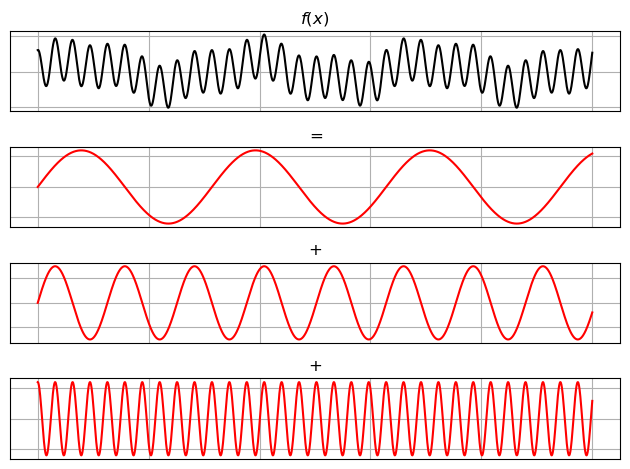

In [4]:
#create a time-varying signal
#define the range of the time domain
L = 10
#Define the number of points in the time domain
n = 2048
#define the time variable
t = np.linspace(0,L,num=n)
#define the main signal
St = (3*np.sin(2*t)+1.5*np.sin(5*t)+6*np.cos(20*(t)))

#break the signal into its individual terms
S1 = (3*np.sin(2*t)) #amplitude = 3 and frequency = 2
S2 = (1.5*np.sin(5*t)) #amplitude = 1.5 and frequency = 5
S3 = (6*np.cos(20*t)) #amplitude = 6 and frequency = 20

#plot the main signal
plt.subplot(4,1,1)
plt.plot(t,St,color='k')
#plt.xlabel('Time $(t)$') 
#plt.ylabel('$S(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('$f(x)$')
plt.grid() 
#plot the first frequency component
plt.subplot(4,1,2)
plt.plot(t,S1,color='r')
#plt.xlabel('Time $(t)$') 
#plt.ylabel('$S_1(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('$=$')
plt.grid() 
#plot the second frequency component
plt.subplot(4,1,3)
plt.plot(t,S2,color='r')
#plt.xlabel('Time $(t)$') 
#plt.ylabel('$S_2(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('$+~$')
plt.grid() 
#plot the third frequency component
plt.subplot(4,1,4)
plt.plot(t,S3,color='r')
#plt.xlabel('Time $(t)$') 
#plt.ylabel('$S_3(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('$+$')
plt.grid() 
plt.tight_layout()
plt.show()

### Odd and Even Functions

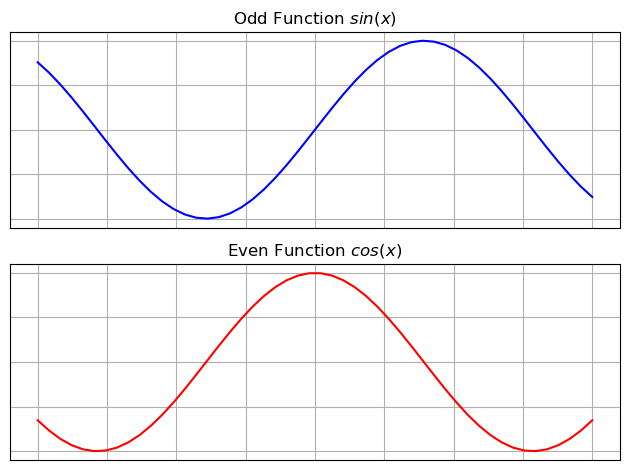

In [6]:
#define a space variabl
x= np.linspace(-4,4,50)

#odd functions
odd_func = np.sin(x)

#even fucntions
even_func = np.cos(x)

#visulaise
#odd function
plt.subplot(2, 1, 1)
plt.plot(x,odd_func,color='b')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Odd Function $sin(x)$')
plt.grid() 
#even funciton
plt.subplot(2, 1, 2)
plt.plot(x,even_func,color='r')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Even Function $cos(x)$')
plt.grid() 
plt.tight_layout()
plt.show()


### Discrete Fourier Transform

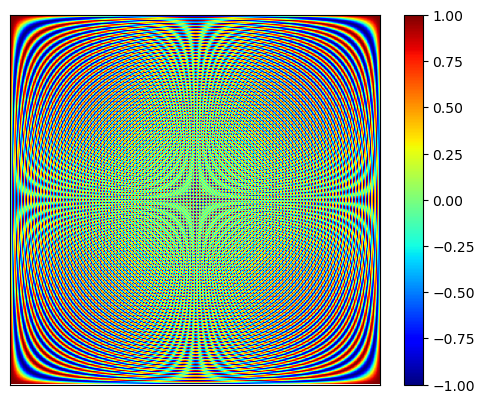

In [8]:
# define the number of points / dimesnion of the DFT matrix
n = 256

#define the natural/fundamental frequency 
omega = cmath.exp(-1j*2*np.pi/n)

#method 1 to calculate DFT matrix
#--------------------------------
def CreateDFTMatrix(n):
    matrix = []
    for j in range(1,n+1):
        row = []
        for i in range(1,n+1):
            DFT_matrix = omega**((i-1)*(j-1))
            row.append(DFT_matrix)
        matrix.append(row)
    return np.array(matrix)

#call the function
DFT = CreateDFTMatrix(n)

#method 2 to calculate DFT matrix
#-------------------------------
#define the range to build a meshgrid
#mesh_range = range(1,n+1)

#buils the DFT matrix
#I, J = np.meshgrid(mesh_range, mesh_range)

#compute the DFT matrix
#DFT = omega**((I-1)*(J-1))


#visulaise the real part of the matrix
plt.imshow(DFT.real,cmap='jet')
plt.colorbar(mappable=None, cax=None, ax=None)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.show()


### Fast Fourier Transform

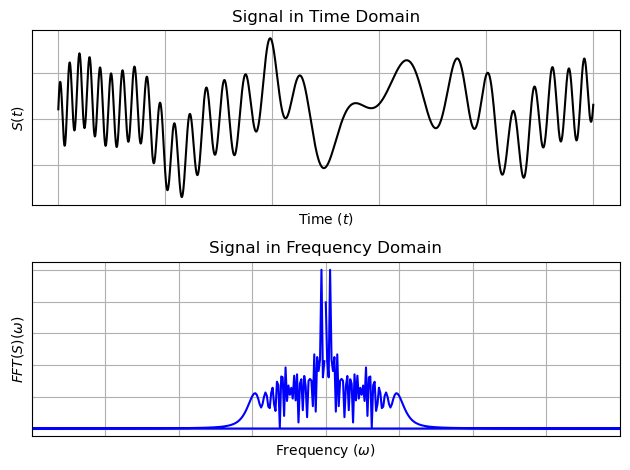

In [10]:
#create a time-varying signal
#define the range of the time domain
L  = 10

#Define the number of points in the time domain
n  = 2048

#define the time variable
t  = np.linspace(0,L,num=n)

#define the signal
St = (3*np.sin(2*t)+0.5*np.tanh(0.5*(t-3))+0.2*np.exp(-(t-4)**2)+1.5*np.sin(5*t)+4*np.cos(3*(t-6)**2))/10+(t/20)**3

#Apply Fast Fourier Transform on the signal S(t)
Sf = np.fft.fft(St)

#Define wave number
k  = np.fft.fftfreq(n,L)

#plot the time signal
#visualise the dataset
plt.subplot(2, 1, 1)
plt.plot(t,St,color='k')
plt.xlabel('Time $(t)$') 
plt.ylabel('$S(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('Signal in Time Domain')
plt.grid() 
#plot the frequency signal
plt.subplot(2, 1, 2)
plt.plot(k, np.abs(Sf)/np.max(np.abs(Sf)),color='b')
plt.xlabel('Frequency $(\omega)$')
plt.ylabel('$FFT(S)(\omega)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.xlim([-0.01 , 0.01]) 
plt.title('Signal in Frequency Domain')
plt.grid() 
plt.tight_layout()
plt.show()


### Fast Fourier Transfrom as a Signal Filtering Tool

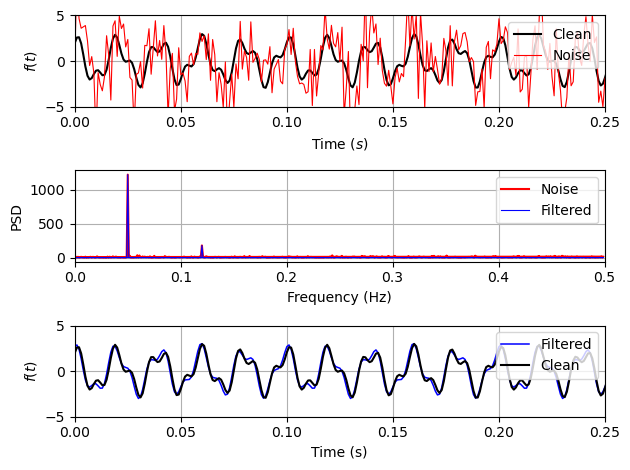

In [14]:
#define the range of the time domain
L = 1

#Define the number of points in the time domain
n = 1000

#define the time variable
t = np.linspace(0,L,num=n)

#define the signal
f = 2*np.cos(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# add Gaissian white noise to the signal
fnoise = f + 2.5*np.random.randn(t.shape[0])

#compute the fast fourier transfom
fhat   =  np.fft.fft(fnoise)

#compute the power spectrum desnity PSD
PSD    = (fhat*np.conjugate(fhat))/n

#Define wave number
k      = np.fft.fftfreq(n,L)

#Use the PSD to filter out the noise
#find all frequencies with large power
indices = PSD > 50
#zero out all others
PSDFiltered= PSD*indices

#zero out all small Fourier doeffs
fhat_filtered = fhat * indices 
#go back to the orginal singla after filtering its noise
f_filtered = np.fft.ifft(fhat_filtered)

#plot the time signal: clear and noisy
plt.subplot(3, 1, 1)
plt.plot(t,f,color='k')
plt.plot(t,fnoise,color='r',linewidth=0.8)
plt.xlabel('Time $(s)$')
plt.xlim([0 , 0.25])
plt.ylim([-5 , 5])
plt.ylabel('$f(t)$')
plt.legend(['Clean','Noise'],loc='upper right')
plt.grid() 
#plot the PSD of the noisy and filtered signals
plt.subplot(3, 1, 2)
plt.plot(k, PSD.real,color='r')
plt.plot(k, PSDFiltered,color='b',linewidth=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.xlim([0 , 0.5])
plt.legend(['Noise','Filtered'])
plt.legend(['Noise','Filtered'],loc='upper right')
plt.grid() 
#plot the original and the filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, f_filtered.real,color='b',linewidth=1.1)
plt.plot(t,f,color='k')
plt.xlabel('Time (s)')
plt.ylabel('$f(t)$')
plt.xlim([0 , 0.25])
plt.ylim([-5 , 5])
plt.legend(['Filtered','Clean'],loc='upper right')
plt.grid() 
plt.tight_layout()
plt.show()


## $\color{Blue}{\text{Time-Frequency Analysis}}$  <a class="anchor" id="section2"></a>

### Windowed Fourier Transform: G$\acute{a}$bor Transform 

The Hungarian physicist, mathematician, and electrical engineer G$\acute{a}$bor D$\acute{e}$nes (Nobel Prize for Physics in 1971 for the discovery of holography in 1947) was the first to propose a formal method for localizing both time and frequency. The G$\acute{a}$bor transform, also known as the short-time Fourier transform (STFT), involves a simple modification of the Fourier transform kernel which is given by:

$$
g_{t,\omega}(\tau) = e^{i\omega \tau} g(t-\tau)
$$

where the new term to the Fourier kernel $g(t-\tau)$ was introduced to localize both time and frequency. The G$\acute{a}$bor transform is defined as the following:

\begin{equation}
    \mathcal{G}[f](t,\omega) = \hat{f}_g(t,\omega) = \int_{-\infty}^\infty f(\tau) \bar{g}(t-\tau) e^{-i\omega \tau} \mathrm{d} \tau = \langle f(\tau),\bar{g}(\tau)_{t,\omega}\rangle
    \label{GaborTransform}
\end{equation}

where the bar denotes the complex conjugate of the function. This equation shows that the G$\acute{a}$bor transform is a function of two variables; time $t$ and frequency $\omega$. Thus the function $g_{t,\omega}(\tau)$ acts as a time filter for localizing the signal over a specific time window. The integration over the parameter $\tau$ slides the time-filtering window down the entire signal to pick out the frequency information at each instant of time. The function $g(t)$ is the kernel, and is often chosen to be a Gaussian:

$$
g(t) = e^{-(t-\tau)^2/a^2}
$$

Here the parameter $a$ determines the spread of the short-time window for the Fourier transform and $\tau$ determines the center of the moving window.


- Narrow window = good time resolution and poor frequency resolution

- Wide window = poor time resolution and good frequency resolution


In [16]:
#create a time-varying signal
#define the range of the time domain
L  = 10
#Define the number of points in the time domain
n  = 2048
#define the time variable
t  = np.linspace(0,L,num=n)
#define the signal
St = (3*np.sin(2*t)+0.5*np.tanh(0.5*(t-3))+0.2*np.exp(-(t-4)**2)+1.5*np.sin(5*t)+4*np.cos(3*(t-6)**2))/10+(t/20)**3


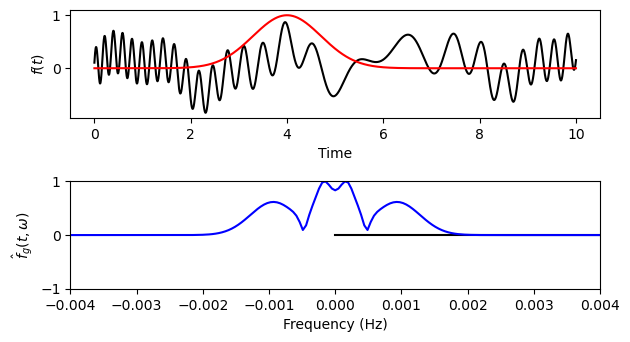

In [18]:
#Time-Frequency Analsyis: Applying Gabor Transform & Spectrogram
#---------------------------------------------------------------

#Define Gabor window
tau   = 4 #the center of the Gaussina
width = 1 #the spread of the Guassian

#define the gabor funciton
g   = np.exp(-(t-tau/width)**2)  

#compute the Gabor signal
Sg  = g*St   

#Define wave number
k   = np.fft.fftfreq(n,L)
ks  = np.fft.fftshift(k) #take its Fourier shift

#Taking the Fourier trasnform of the resulting signal
Sgf = np.fft.fft(Sg)
Sgf = abs(np.fft.fftshift(Sgf))/max(abs(np.fft.fftshift(Sgf))) #take its Foruier shift and normalise it

#plotting 
plt.figure()
#plot the time-varying signal
plt.subplot(3,1,1)
plt.plot(t,St,'k')
plt.plot(t,g,'r')
plt.xlabel("Time")
plt.ylabel("$f(t)$")
#plot the Gabor Signal
plt.subplot(3,1,2)
plt.plot(t,Sg,"k")
plt.xlabel("Time")
plt.ylabel("$f(t).g(t)$")
plt.ylim([-1, 1])
#plot the Fourier Transofrm of the Gabor Signal
plt.subplot(3,1,2)
plt.plot(ks,Sgf,"b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\hat{f}_g(t,\omega)$")
plt.xlim([-0.004 , 0.004])
plt.tight_layout()
plt.show()

### Spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal and their amplitudes as it varies with time all on one graph. 

Spectrograms are two-dimensional graphs, with a third dimension represented by colors. Time runs from left (oldest) to right (youngest) along the horizontal axis. The vertical axis represents frequency with the lowest frequencies at the bottom and the highest at the top. The amplitude (or energy or “loudness”) of a particular frequency at a specific time is represented by the third dimension, color, with dark reds corresponding to low amplitudes and brighter colors up through blue corresponding to progressively stronger (or louder) amplitudes. 

The Spectrogram matrix, where its rows correspond to the frequencies captured at a specific time and its columns correspond to the time length of the signal, is computed by taking the magnitude squared of the G$\acute{a}$bor transform.

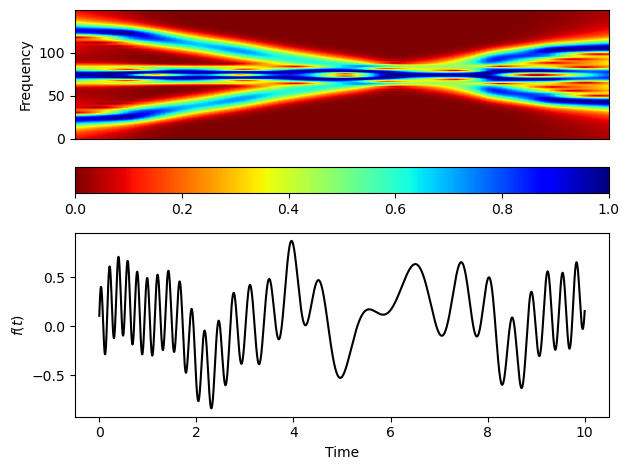

In [20]:
#Time-Frequency Analsyis: Applying Gabor Transform & Spectrogram
#---------------------------------------------------------------
#Define the time variable for iteration
m = 100
tau = np.linspace(0,L,num=m)

#go through the iterations and calculate Gabor function in each
spec = [] #initilaise the spectrogram matrix
for i in range(len(tau)): 
    #define the width of the Guassian window
    width = 1
    #Define Gabor window/Gaussian 
    tslide = t-tau[i]
    g = np.exp(-(tslide/width)**2)    
    #Gabor signal
    Sg = g*St    
    #Taking the Fourier trasnform of the resulting signal
    Sgf = np.fft.fft(Sg)  
    #store the spectrogram data at each iteration
    spec.append(abs(np.fft.fftshift(Sgf))/np.max(abs(np.fft.fftshift(Sgf))))

#slice/extract the spectrgram matrix
spec = np.array(spec) #convert it to nd array
spec = spec[:,950:1100] #slice it: choose the frequencies that matter 

#plotting 
plt.figure()
#plot the spectrogram
plt.subplot(2,1,1)
plt.imshow(np.transpose(spec),cmap = "jet_r")
plt.ylim([900 , 1150])
plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False) 
plt.axis("tight")
#plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(location='bottom')
#plot the time-varying signal
plt.subplot(2,1,2)
plt.plot(t,St,"k")
plt.xlabel("Time")
plt.ylabel("$f(t)$")
plt.axis("tight")
plt.tight_layout()
plt.show()


### Wavelets \& Multi-Resolution Analysis 

 Wavelet analysis begins with the consideration of a function known as the mother wavelet:

\begin{equation}
    \psi_{a,b} = \psi \left(\frac{t-b}{a}\right)
    \label{MotherWavelet}
\end{equation}

\noindent where $a \neq 0$ and $b$ are real contacts. The parameter $a$ is the scaling parameter whereas the parameters $b$ now denotes the translation parameter

#### Discrete Wavelet Transform: Haar Wavelet
\begin{equation}
\psi_{a,b}(t) = \left\{
\begin{array}{ll}
      1 & \mathrm{for}\quad b\leq t < a/2 \\
      -1 & \mathrm{for}\quad a/2\leq t < a \\
      0 & \mathrm{Otherwise} 
\end{array} 
\right.
    \label{HaarWavelet}
\end{equation}

#### Continuous Wavelet Transform: Mexican Hat Wavelet
\begin{equation}
    \psi_{a,b}(t) = \left[1-\left(\frac{t-b}{a}\right)^2\right] e^{-\frac{1}{2}\left(\frac{t-b}{a}\right)^2}
    \label{MexicanHatWavelet}
\end{equation}

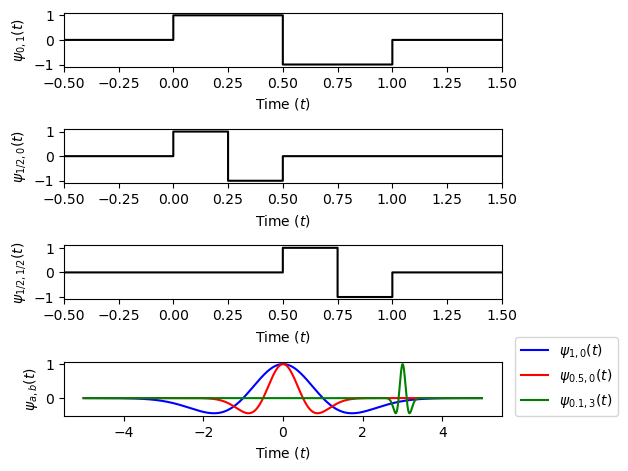

In [22]:
#define the t variable
t = np.arange(-5, 5, 0.01)

#define the Haar function
#define the total width of the step
a = 1 #for Haar wavelet 1,0
b = 0.5 #for Haar wavelet 1/2,0
c = 0.5 #for Haar wavelet 1/2,1/2
#Haar function 1,0
psi_haar_a = np.piecewise(t,
    [(t>=0) & (t<a/2), (t>=a/2) & (t<a)],
    [lambda x: 1, lambda x: -1, lambda x:0])
#Haar function 1/2,0
psi_haar_b = np.piecewise(t,
    [(t>=0) & (t<b/2), (t>=b/2) & (t<b)],
    [lambda x: 1, lambda x: -1, lambda x:0])
#Haar function 1/2,1/2
tc = t-0.5
psi_haar_c = np.piecewise(t,
    [(tc>=0) & (tc<c/2), (tc>=c/2) & (tc < c)],
    [lambda x: 1, lambda x: -1, lambda x:0])

#Mexican hat Wavelet
#psi_{1,0}
a1 = 1
b1 = 0
psi_mexican1 = (1-((t-b1)/a1)**2)*np.exp(-((t-b1)/a1)**2/2)
#psi_{0.5,0}
a2 = 0.5
b2 = 0
psi_mexican2 = (1-((t-b2)/a2)**2)*np.exp(-((t-b2)/a2)**2/2)
#psi_{0.1,3}
a3 = 0.1
b3 = 3
psi_mexican3 = (1-((t-b3)/a3)**2)*np.exp(-((t-b3)/a3)**2/2)

#plotting the wavelets
plt.figure()
#show the Haar Wavelet 1,0
plt.subplot(4,1,1)
plt.step(t,psi_haar_a,'k')
plt.xlabel("Time $(t)$")
plt.ylabel("$\psi_{0,1}(t)$")
plt.xlim([-0.5 , 1.5])
#show the Haar Wavelet 1/2,0
plt.subplot(4,1,2)
plt.step(t,psi_haar_b,'k')
plt.xlabel("Time $(t)$")
plt.ylabel("$\psi_{1/2,0}(t)$")
plt.xlim([-0.5 , 1.5])
#show the Haar Wavelet 1/2,1/2
plt.subplot(4,1,3)
plt.step(t,psi_haar_c,'k')
plt.xlabel("Time $(t)$")
plt.ylabel("$\psi_{1/2,1/2}(t)$")
plt.xlim([-0.5 , 1.5])
#show the Mexican hat Wavelet
plt.subplot(4,1,4)
plt.plot(t,psi_mexican1,'b')
plt.plot(t,psi_mexican2,'r')
plt.plot(t,psi_mexican3,'g')
plt.xlabel("Time $(t)$")
plt.ylabel("$\psi_{a,b}(t)$")
plt.legend(['$\psi_{1,0}(t)$','$\psi_{0.5,0}(t)$','$\psi_{0.1,3}(t)$'],loc=(1.03,0))
plt.tight_layout()
plt.show()


In [24]:
#The PyWavelets library contains 14 mother Wavelets families
#import library
import pywt

#show all available wavelets
#wavelets families
print('The families of the avaible wavelets are:  ','\n', pywt.families(short=False),'\n')
#continuous wavelets
print('The avaiable continuous wavelets are:  ','\n', pywt.wavelist(kind='continuous'),'\n')
#discrete wavelets
print('The avaiable Discrete wavelets are:  ','\n', pywt.wavelist(kind='discrete'),'\n')

#show the details of wavelet
Haar = pywt.Wavelet('haar') #For discret wavelets, use Wavelet
print('The Haar wavelet in Python has the folllowing features: ',Haar,'\n')

Mexican = pywt.ContinuousWavelet('mexh') #For continous wavelets, use ContinuousWavelet
print('The Mexican hat wavelet in Python has the folllowing features: ',Mexican,'\n')

The families of the avaible wavelets are:   
 ['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets'] 

The avaiable continuous wavelets are:   
 ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan'] 

The avaiable Discrete wavelets are:   
 ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', '

### Scaleogram

As we have seen before, the spectrogram, defined as the absolute value of the short-time Fourier transform, is a very common tool in signal analysis because it provides a distribution of the energy (or intensity or magnitude) of the signal in the time-frequency plane. 

A similar distribution can be defined in the wavelet case. This leads us to define the wavelet spectrogram, of Scaleogram, as the absolute value of the wavelet transform plotted as a function of time and scale parameter with the intensity being expressed by a range of colors.

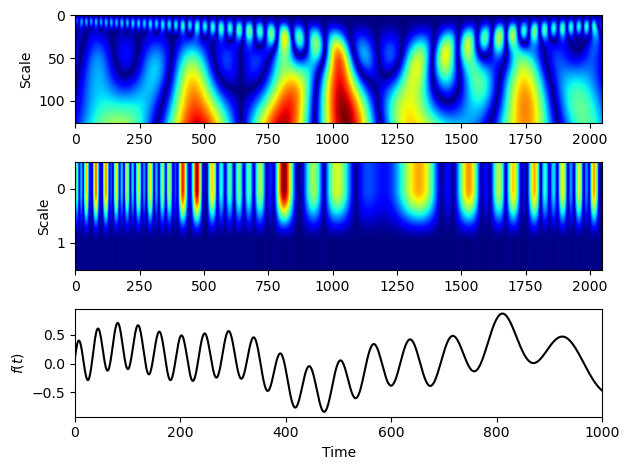

In [26]:
#define the signals
#define the range of the time domain
L  = 10
#Define the number of points in the time domain
n  = 2048

#define the time variable tc
tc  = np.linspace(0,L,num=n)
#Signal 1:
signal1c = (3*np.sin(2*tc)+0.5*np.tanh(0.5*(tc-3))+0.2*np.exp(-(tc-4)**2)+1.5*np.sin(5*tc)+4*np.cos(3*(tc-6)**2))/10+(tc/20)**3
# Apply CWT
coefficients1c, frequencies1c = pywt.cwt(signal1c, scales=np.arange(1, 128), wavelet='mexh') #mexican

#define the time variable td
td = np.linspace(0,L,num=n*2)
#Signal 1:
signal1d = (3*np.sin(2*td)+0.5*np.tanh(0.5*(td-3))+0.2*np.exp(-(td-4)**2)+1.5*np.sin(5*td)+4*np.cos(3*(td-6)**2))/10+(td/20)**3
#apply the DWT
coefficients1d                = pywt.dwt(signal1d, wavelet='haar') #haar

# Plotting
plt.figure()
#plot mexican wavelet
plt.subplot(3,1,1)
plt.imshow(np.abs(coefficients1c)/np.max(np.abs(coefficients1c)), aspect='auto', cmap='jet')
#plt.colorbar(label="Magnitude",location='top')
plt.ylabel("Scale")
#plot the haar
plt.subplot(3,1,2)
plt.imshow(np.abs(coefficients1d)/np.max(np.abs(coefficients1d)), aspect='auto',cmap='jet')
#plt.colorbar(label="Magnitude",location='bottom')
plt.ylabel("Scale")
#plot the signal
plt.subplot(3,1,3)
plt.plot(signal1c,'k')
plt.xlabel("Time")
plt.ylabel("$f(t)$")
plt.xlim([0 , len(t)])
plt.tight_layout()
plt.show()

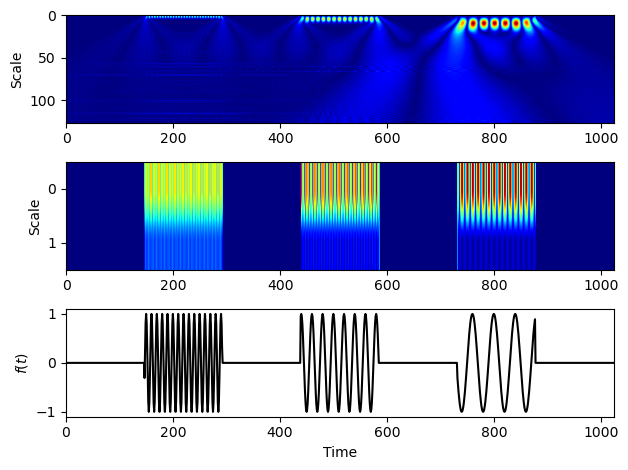

In [30]:
#Define the number of points in the time domain
n  = 1024

#define the time variable tc
tc = np.arange(n)
#Signal 2:
signal2c= np.zeros(n)
steps  = np.linspace(0, n, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (tc > steps[i*2+1]) & (tc < steps[i*2+2])
    signal2c += np.cos(2*np.pi/periods[i]*tc) * step_mask
# Apply CWT
coefficients2c, frequencies2c = pywt.cwt(signal2c, scales=np.arange(1, 128), wavelet='mexh') #mexican

#define the time variable td
td = np.arange(2*n)
#Signal 2:
signal2d= np.zeros(2*n)
steps  = np.linspace(0, 2*n, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (td > steps[i*2+1]) & (td < steps[i*2+2])
    signal2d += np.cos(2*np.pi/periods[i]*td) * step_mask
# Apply DWT
coefficients2d                = pywt.dwt(signal2d, wavelet='haar') #haar

# Plotting
plt.figure()
#plot mexican wavelet
plt.subplot(3,1,1)
plt.imshow(np.abs(coefficients2c)/np.max(np.abs(coefficients2c)), aspect='auto', cmap='jet')
#plt.colorbar(label="Magnitude",location='top')
plt.ylabel("Scale")
#plot the haar
plt.subplot(3,1,2)
plt.imshow(np.abs(coefficients2d)/np.max(np.abs(coefficients2d)), aspect='auto',cmap='jet')
#plt.colorbar(label="Magnitude",location='bottom')
plt.ylabel("Scale")
#plot the signal
plt.subplot(3,1,3)
plt.plot(tc,signal2c,'k')
plt.xlabel("Time")
plt.ylabel("$f(t)$")
plt.xlim([0 , len(tc)])
plt.tight_layout()
plt.show()